<a href="https://colab.research.google.com/github/charlieLehman/convexoptimization/blob/master/ECE8823_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7

## a)

[[20  1  2]
 [20  2  3]
 [20  3  4]
 [20  4  5]
 [20  5  6]
 [20  6  7]
 [20  7  8]
 [20  8  9]
 [20  9 10]
 [20 10 11]
 [20 11 12]
 [20 12 13]
 [20 13 14]
 [20 14 15]
 [20 15 16]
 [20 16 17]
 [20 17 18]
 [20 18  1]
 [20 19 20]]


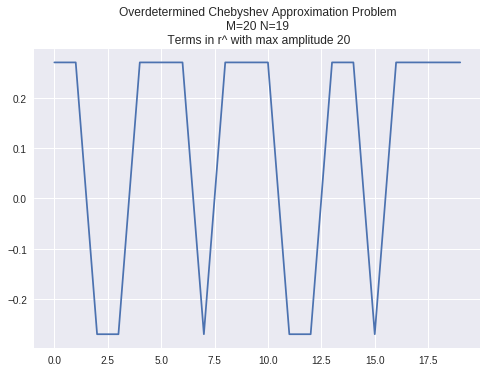

In [13]:
import cvxpy as cp
import numpy as np
import pylab as plt

t_in_r = []
for n in range(1,20):
    m=20
    A = np.random.randn(m, n)
    y = np.random.randn(m)

    x = cp.Variable(n)
    objective = cp.Minimize(cp.norm_inf(y - A@x))
    prob = cp.Problem(objective)
    try:
        result = prob.solve()
        x_ = x.value
        r = y - A@x_
        terms_in_r = (np.isclose(np.abs(r), np.max(np.abs(r)), 1e-8)).sum()
        t_in_r.append((m,n,terms_in_r))
    except:
        continue
            

tinr = np.array(t_in_r)
print(tinr)
print("==========")
plt.plot(r)
plt.title('Overdetermined Chebyshev Approximation Problem\nM={} N={}\n Terms in r^ with max amplitude {}'.format(m,n,terms_in_r))
plt.show()


There are two distinct cases regarding the number of components of $\hat{\mathbf{r}}$ with maximum amplitude: $1+N$ or $1$.

## b)

[[20  1 19]
 [20  2 20]
 [20  3 17]
 [20  4 16]
 [20  5 15]
 [20  6 14]
 [20  7 20]
 [20  8 12]
 [20  9 11]
 [20 11  9]
 [20 12  8]
 [20 13  7]
 [20 14  6]
 [20 15  5]
 [20 16  4]
 [20 17  3]
 [20 18  2]
 [20 19  1]]


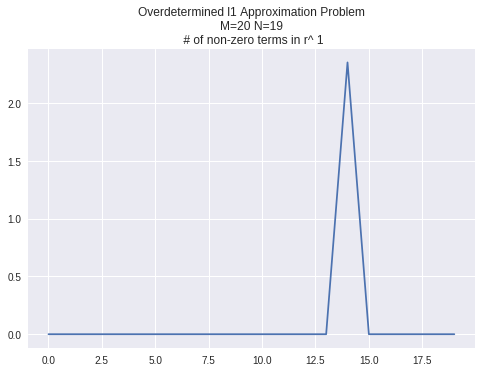

In [10]:
import cvxpy as cp
import numpy as np
import pylab as plt

t_in_r = []
for n in range(1,20):
    m=20
    A = np.random.randn(m, n)
    y = np.random.randn(m)

    x = cp.Variable(n)
    objective = cp.Minimize(cp.norm1(y - A@x))
    prob = cp.Problem(objective)
    try:
        result = prob.solve()
        x_ = x.value
        r = y - A@x_
        terms_in_r = r.shape[0] - (np.isclose(r,0,1e-18)).sum()
        t_in_r.append((m,n,terms_in_r))
    except:
        continue
tinr = np.array(t_in_r)
print(tinr)
print("==========")

plt.plot(r)
plt.title('Overdetermined l1 Approximation Problem\nM={} N={}\n # of non-zero terms in r^ {}'.format(m,n,terms_in_r))
plt.show()


The number of non-zero terms in $\hat{\mathbf{r}}$ is $M-N$.

## c)

[[ 1 20 20]
 [ 2 20 19]
 [ 3 20 18]
 [ 4 20 17]
 [ 5 20 16]
 [ 6 20 15]
 [ 7 20 14]
 [ 8 20  1]
 [ 9 20 12]
 [10 20 11]
 [11 20  1]
 [12 20  9]
 [13 20  1]
 [14 20  1]
 [15 20  6]
 [16 20  5]
 [17 20  4]
 [18 20  3]
 [19 20  2]]


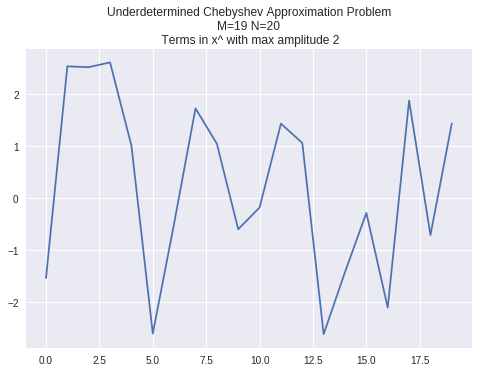

In [23]:
import cvxpy as cp
import numpy as np
import pylab as plt

t_in_r = []
for m in range(1,20):
    n=20
    A = np.random.randn(m, n)
    b = np.random.randn(m)

    x = cp.Variable(n)
    objective = cp.Minimize(cp.norm_inf(x))
    constraints = [b == A@x]
    prob = cp.Problem(objective, constraints)
    try:
        result = prob.solve()
        x_ = x.value
        terms_in_r = (np.isclose(np.abs(x_), np.max(np.abs(x_)), 1e-8)).sum()
        t_in_r.append((m,n,terms_in_r))
    except:
        continue
            

tinr = np.array(t_in_r)
print(tinr)
print("==========")
plt.plot(x_)
plt.title('Underdetermined Chebyshev Approximation Problem\nM={} N={}\n Terms in x^ with max amplitude {}'.format(m,n,terms_in_r))
plt.show()

The number of terms in $\hat{\mathbf{x}}$ with max amplitude is $N-M+1$.

## d)

[[ 1 20 20]
 [ 2 20 20]
 [ 3 20 20]
 [ 4 20 20]
 [ 5 20 20]
 [ 6 20 20]
 [ 7 20 20]
 [ 8 20 20]
 [ 9 20 20]
 [10 20 20]
 [11 20 20]
 [12 20 20]
 [13 20 20]
 [14 20 20]
 [15 20 20]
 [16 20 20]
 [17 20 20]
 [18 20 20]
 [19 20 20]]


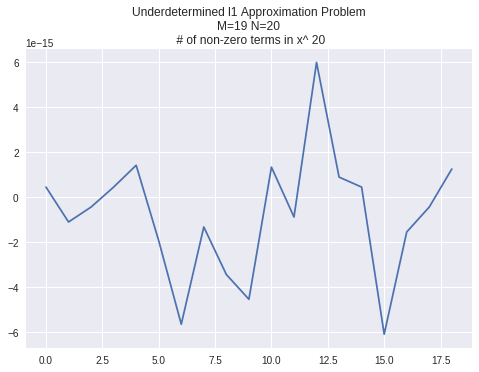

In [35]:
import cvxpy as cp
import numpy as np
import pylab as plt

t_in_r = []
for m in range(1,20):
    n=20
    A = np.random.randn(m, n)
    y = np.random.randn(m)

    x = cp.Variable(n)
    objective = cp.Minimize(cp.norm1(y - A@x))
    prob = cp.Problem(objective)
    try:
        result = prob.solve()
        x_ = x.value
        terms_in_r = x_.shape[0] - (np.isclose(x_,0,1e-18)).sum()
        t_in_r.append((m,n,terms_in_r))
    except:
        continue
tinr = np.array(t_in_r)
print(tinr)
print("==========")

plt.plot(r)
plt.title('Underdetermined l1 Approximation Problem\nM={} N={}\n # of non-zero terms in x^ {}'.format(m,n,terms_in_r))
plt.show()

The number of non-zero terms in $\hat{\mathbf{x}}$ is $N$.